<a href="https://colab.research.google.com/github/timbax98/Neurodynamics_2023/blob/main/HW3_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install brian2
!pip install brian2tools
!pip install neurodynex

In [2]:
import brian2 as b2
import matplotlib.pyplot as plt 
import numpy as np

## Question 1

In [3]:
a = 1.0
b = 0.5
THETA = 0.1
I = 0

In [4]:
def draw_phase_portrait(I, a, b, THETA):

    v = np.linspace(-3,3, 40)
    

    v_nullcline = [i-(i*i*i/3) + I for i in v]
    w_nullcline = [(i+a)/b for i in v]

    plt.figure(figsize=(10,8))
    

    plt.plot(v, v_nullcline)
    plt.plot(v, w_nullcline)
    plt.xlabel("membrane voltage, V")
    plt.ylabel("recovery, w")
    plt.title("Nullclines for I=0")
    plt.axis([-3, 3, -3, 3])

    vv = np.linspace(-3,3, 20)
    ww = np.linspace(-3,3, 20)
    (VV, WW) = np.meshgrid(vv, ww)

    dV = VV - (VV*VV*VV/3) - WW + I
    dW = THETA * (VV + a - b * WW)
    vel = np.sqrt(dV**2 + dW**2)

    # Use quiver function to plot the phase plane
    plt.quiver(VV, WW, dV, dW, vel)    

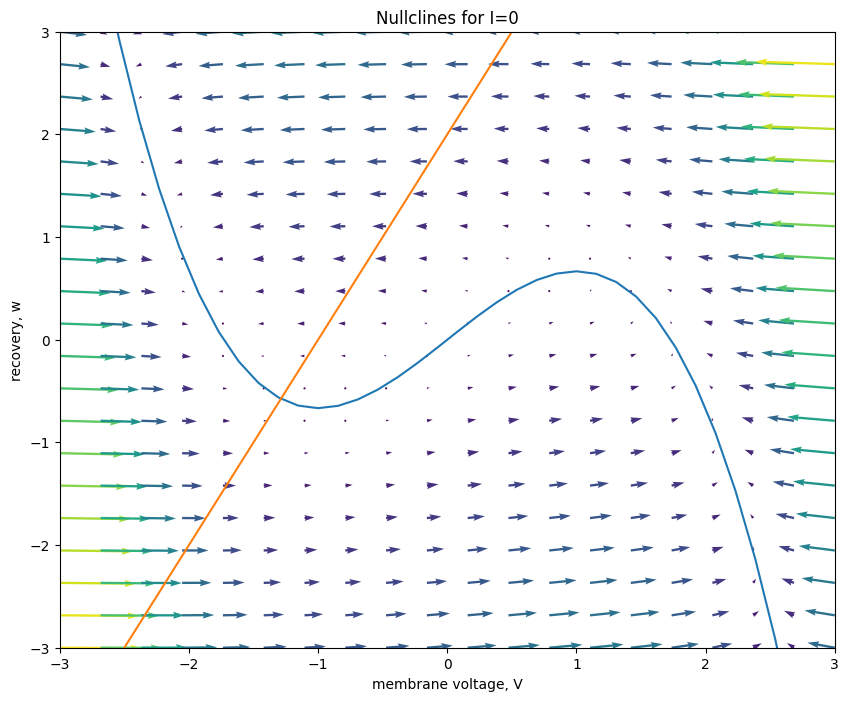

In [5]:
draw_phase_portrait(I,a,b, THETA)

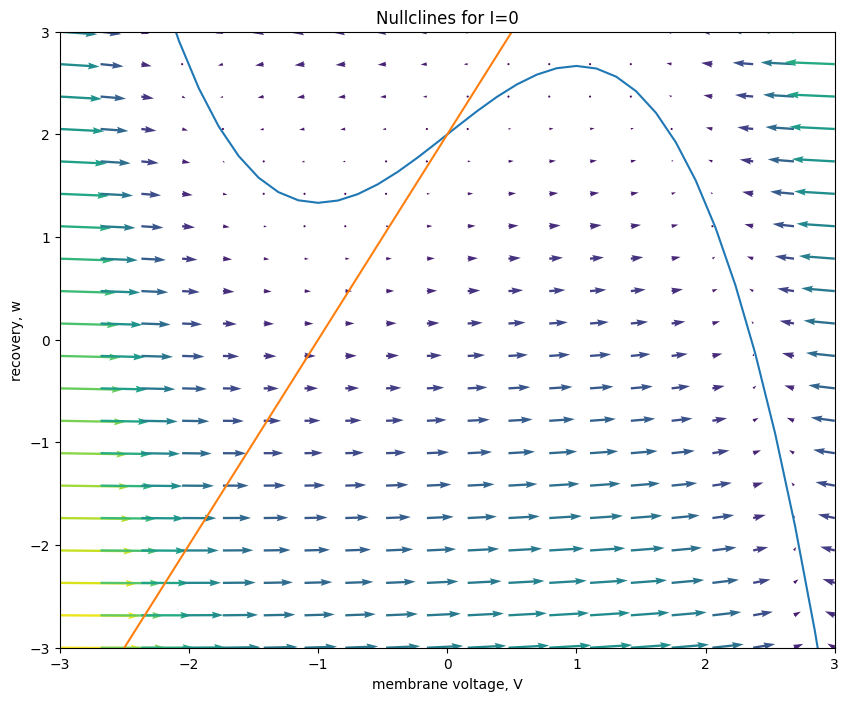

In [6]:
draw_phase_portrait(I=2, a=a, b=b, THETA=THETA)

## Question 2

In [7]:
def sim_fhn(I, sim_time): 
    # get the parameterization correct!
    a = 1.0
    b = 0.5
    phi = 0.1
    
    # a = 2.0
    # eps = 0.1
    
    # original model parameterization
    # eqs = """
    # dV/dt = 1/ms * (V - (V**3)/3 - w + I) : 1
    # dw/dt = phi/ms * (V + a - b*w) : 1
    # """
    eqs = """
    dV/dt = 1/ms * (V - (V**3)/3 - w + I) : 1
    dw/dt = phi/ms * (V + a - b*w) : 1
    """
    # eqs = """
    # dV/dt = 1/ms * ( V - (V**3)/3 - w + I_e ) : 1
    # dw/dt = eps/ms * (V + 0.5 * (a - w)) : 1
    # """ 

    # eps ( b_0 + b_1 V - w ) = eps*b_0 + eps*b_1*V - eps * w = eps * b_0/b_1 + eps*V - eps/b_1 * w = eps( b_0/b_1 + V - 1/b_1 * w
    
    # b_0 = 0.9 --> a = b_0/b_1 .9
    # b_1 = 1.0 --> b = 1/b_1 = 1.0
    # eps = 1.25 --> 
    
    # v - v^3 -w + I_e
    # V + .5*a - 0.5w
    
    fhn_neuron = b2.NeuronGroup(1, eqs, method="euler")

    fhn_neuron.V = -2
    fhn_neuron.w = 0.4

    state_monitor = b2.StateMonitor(fhn_neuron, ["V", "w"], record=True)

    fhn_net = b2.Network(fhn_neuron)
    fhn_net.add(state_monitor)
    
    fhn_net.run(sim_time)
    
    return state_monitor

In [8]:
state_mon1 = sim_fhn(0,500*b2.ms)

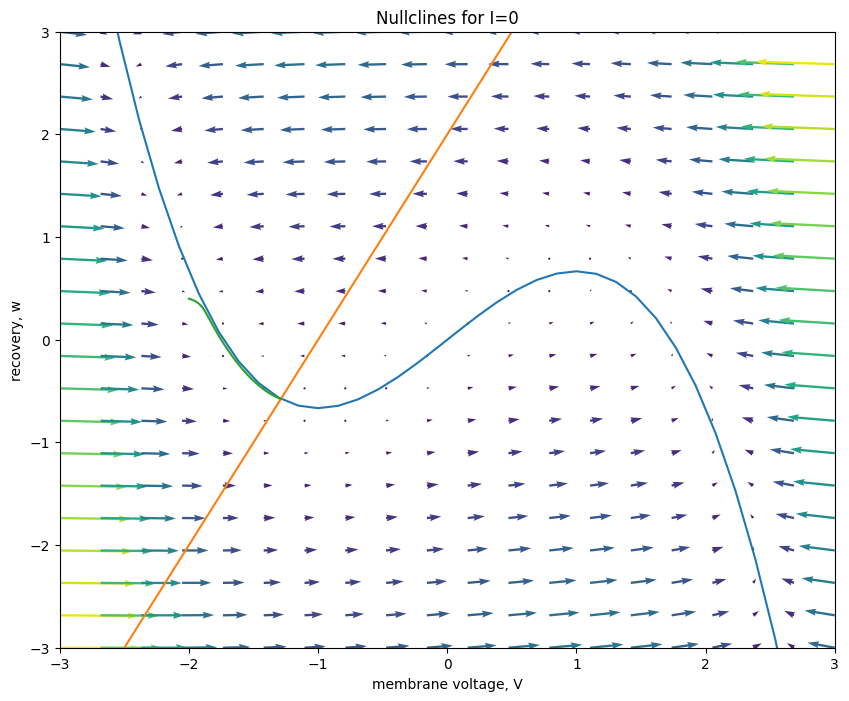

In [9]:
draw_phase_portrait(I, a, b, THETA)
plt.plot(state_mon1.V[0], state_mon1.w[0])

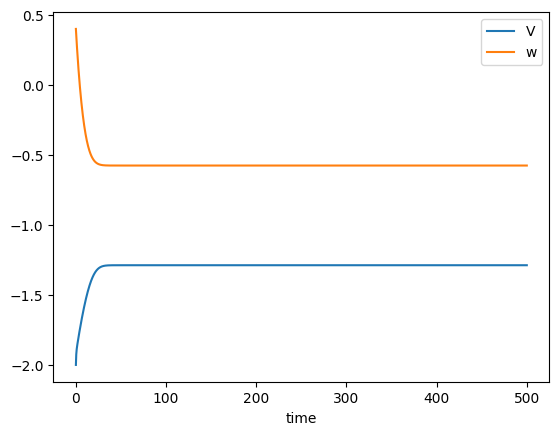

In [10]:
plt.plot(state_mon1.t/b2.ms, state_mon1.V[0])
plt.plot(state_mon1.t/b2.ms, state_mon1.w[0])
plt.xlabel("time")
plt.legend(["V", "w"])

In [11]:
state_mon2 = sim_fhn(2,500*b2.ms)

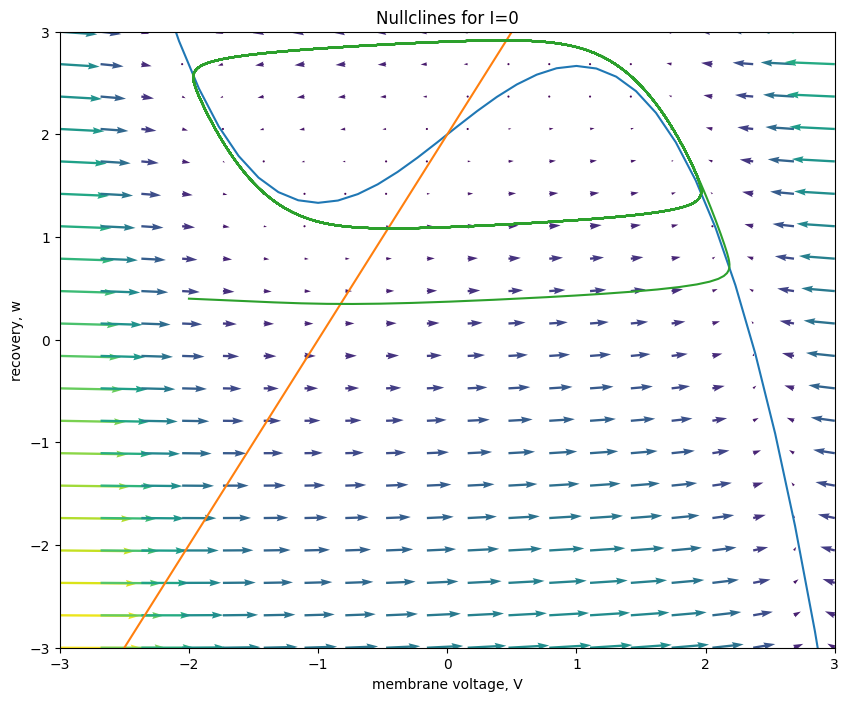

In [12]:
draw_phase_portrait(2, a, b, THETA)
plt.plot(state_mon2.V[0], state_mon2.w[0])

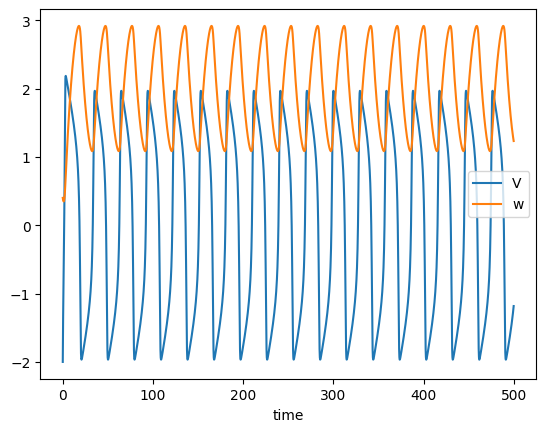

In [13]:
plt.plot(state_mon2.t/b2.ms, state_mon2.V[0])
plt.plot(state_mon2.t/b2.ms, state_mon2.w[0])
plt.xlabel("time")
plt.legend(["V", "w"])

## Question 3

In [14]:
states = sim_fhn(0.8, 500 * b2.msecond)

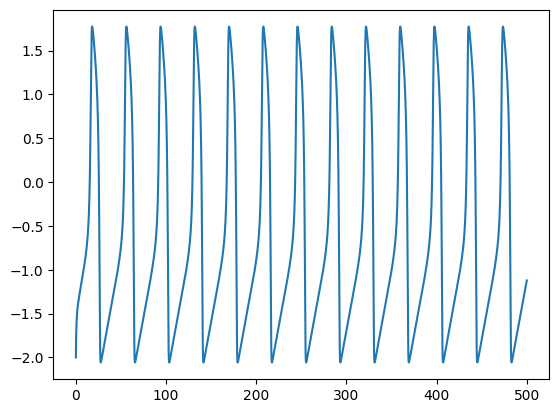

In [15]:
plt.plot(states.t/b2.ms, states.V[0])

In [16]:
def spike_count(arr, thr):
    above_threshold = np.greater_equal(arr, thr).astype(int)
    spikes = above_threshold[1:] - above_threshold[:-1]
    unique_vals, counts = np.unique(spikes, return_counts=True)
    
    if np.isin(1, unique_vals):
        return counts[-1]
    else:
        return 0

In [17]:
spike_count(states.V[0], 1)

13

In [18]:
def f_I(I):
    states = sim_fhn(I, 500 * b2.msecond)
    return states.V[0]

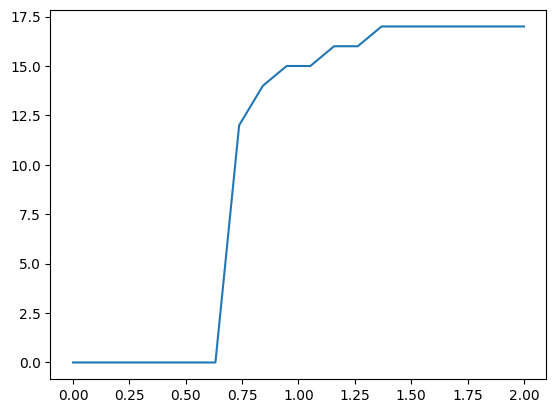

In [19]:
inputs = np.linspace(0.0,2.0, num = 20)
fre_states = [f_I(input) for input in inputs]
frequency = [spike_count(i,1) for i in fre_states]
plt.plot(inputs, frequency)

